# ML 101

## Introduction


A time series is a sequence of data arranged chronologically, in principle, equally spaced in time. Time series forecasting is the use of a model to predict future values based on previously observed values, with the option of also including other external variables.

When working with time series, it is seldom needed to predict only the next element in the series (*t+1*). Instead, the most common goal is to predict a whole future interval (*t+1, ..., t+n*)  or a far point in time (*t+n*). There are several strategies that allow generating this type of multiple predictions.
<br>

**Recursive multi-step forecasting**

Since the value of *t(n)* is required to predict the point *t(n-1)*, and *t(n-1)* is unknown, it is necessary to make recursive predictions in which, each new prediction, is based on the previous one. This process is known as recursive forecasting or recursive multi-step forecasting.

![](https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/images/forecasting_multi-step.gif)


The main challenge when using scikit-learn models for recursive multi-step forecasting is transforming the time series in an matrix where, each value of the series, is related to the time window (lags) that precedes it. This forecasting strategy can be easily generated with the classes `ForecasterAutoreg` and `ForecasterAutoregCustom`.

![](https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/images/transform_timeseries.gif)

<center><font size="2.5"> <i>Time series  transformation into a matrix of 5 lags and a vector with the value of the series that follows each row of the matrix.</i></font></center>


![](https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/images/matrix_transformation_with_exog_variable.png)

<center><font size="2.5"> <i>Time series transformation including an exogenous variable.</i></font></center>



In [2]:
!pip install skforecast

     |████████████████████████████████| 81 kB 7.9 MB/s 
     |████████████████████████████████| 9.8 MB 44.2 MB/s 
     |████████████████████████████████| 15.7 MB 51.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

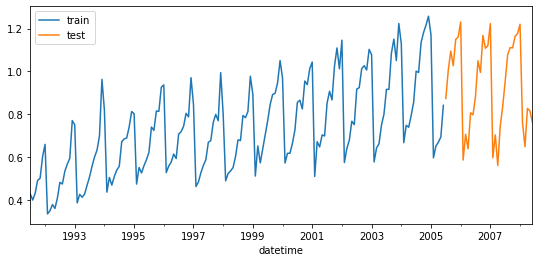

In [2]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend()

In [3]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15
             )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-02-11 12:13:16 
Last fit date: 2022-02-11 12:13:17 
Skforecast version: 0.4.2 

In [4]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36)
predictions.head(3)

2005-07-01    0.921840
2005-08-01    0.954921
2005-09-01    1.101716
Freq: MS, Name: pred, dtype: float64

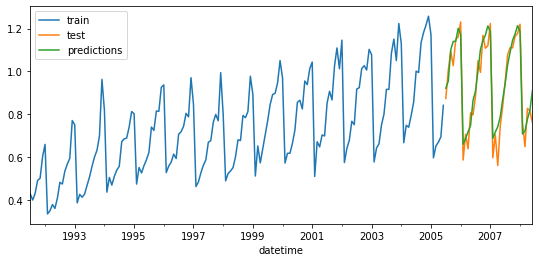

In [5]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [6]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00429855684785846


In [7]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

,feature,importance
0,lag_1,0.012340
1,lag_2,0.085160
2,lag_3,0.013407
3,lag_4,0.004374
4,lag_5,0.003188
5,lag_6,0.003436
6,lag_7,0.003136
7,lag_8,0.007141
8,lag_9,0.007831
9,lag_10,0.012751
